# Surya Sama Homework Set 2
$\renewcommand{bs}{\mathbf}$

To retrieve data for this assignment, you may use `pandas_datareader` which can either be installed using `conda`:
* `conda install -c anaconda pandas-datareader`

or `pip`:
* `pip install pandas-datareader`

**Unless expressly told not to, you may use functions and routines from the standard `Python` libraries. Make sure that you clearly indicate any libraries that you import. But also make sure that you understand what the function you are calling actually does.**

## Problem 1 (25 points):

You have heard about arbitrage in previous courses, but you may not have actually looked at the different types of arbitrage opportunities mathematically and conducted tests for the existence of arbitrage. We can frame this problem as follows: assume that all securities in the economy cost one dollar, but the returns ($\bs{r}$) they offer investors differ in different states of the world at time $t=1$.

So our world consists of $n$ assets and $m$ states of the world. Returns can be summarized in an $m \times n$ matrix $S$ of gross returns:

$$
S = 
\begin{bmatrix}
1+r_{11} & \cdots & r_{1n} \\
\vdots & \ddots & \vdots \\
1+r_{m1} & \cdots & r_{mn} 
\end{bmatrix}
$$


Each row is a different state of the world and each column is a different asset. If the number of assets equals the number of states of the world the market is complete. Suppose investors in our market strictly prefer more to less and want to maximize end-of-period wealth. Further assume that they are unrestricted (holdings do not need to sum to one and shorting is allowed). If $\bs{w}$ is an $n \times 1$ vector of the percentage holdings in the assets, arbitrage exists if an investor can:
* construct a portfolio with positive value today and no further obligation (zero cash flows in all states of the world) - this is known as first-order arbitrage, or 
* purchase a portfolio for zero cost that will pay off a positive amount in at least one state of the world while paying out nothing in all other states – this is known as second-order arbitrage.

Arbitrage in this market can be found by solving a linear program:
$$
\min_{\bs{w}} \bs{c} =\bs{w}'\bs{1}
$$
$$
\text{subject to: }
S \bs{w} \ge \bs{0}
$$

Where the cost $\bs{c}$ of establishing an arbitrage portfolio is minimized subject to a payoff constraint. In the constraint, the $\bs{0}$ is a $m \times 1$ vector of zeros and, in the objective function, $\bs{1}$ is a $\bs{n} \times \bs{1}$ vector of ones.


| Case | Objective | Case Constraint |
|:----: |:--------: |:--------------: |
|No Arbitrage | $\bs{c} = \bs{0}$ | $S\bs{w} = \bs{0}$ |
| 1<sup>st</sup> order arbitrage | $\bs{c} = \infty$ | Feasible |
| 2<sup>nd</sup> order arbitrage | $\bs{c} = \bs{0}$ | Feasible, not all constraints binding |

1. What does the definition of a complete market hinge upon? Do you think markets are complete? Why or why not?
2. Starting simply, generate asset returns for three states of the world where each return is independent, normal, and has the same mean and volatility, 7% expected return and 15% standard deviation. Now solve the linear programming problem and check to see if arbitrage exists (chances are that it does not!) – remember to build code for all of this (including the code to test for the two types of arbitrage) and make it general since you will be using it in the next part. Can you find the state prices?
2. Now expand on your work in part 2.  Suppose you now have 100 assets and 200 states – again, in each case, iid normal (mean = 7% and standard deviation = 15%). Run 1,000 simulations, checking for arbitrage in each simulation. What is the frequency of each type of arbitrage in this simulation (a histogram may be appropriate)?  In general, what are the implications of these results for numerical simulations?

**Hint:**
Use a seed value for the random number generator so your results can be replicated.

## Problem 1 Solution

## Part 1

## The definition of complete markets means that for n assets being traded there are n different markets which can lead to high chance of arbitrage. Even though there exists high chances of arbitrage, the prices will revert to uniform prices in all markets once the arbitrage oppurtunity is exhausted and this will bring much liquidity to the markets. In real world it is impossible to imagine complete markets due to huge number of assets being traded across the world in comparitively low number of markets.

## Part 2

In [59]:
import numpy as np
mu , sd = 0.07, 0.15
r1 = np.random.normal(mu, sd ,3) # Generating 3 asset returns in 3 states
r2 = np.random.normal(mu, sd, 3)
r3 = np.random.normal(mu, sd, 3)
r1 = (r1 +1)
r2 = (r2 +1)
r3 = (r3 +1)
r1 = r1 * (-1)
r2 = r2 * (-1)
r3 = r3 * (-1)
# Solving the linear programming problem to find the minimum cost of the portfolio
from scipy.optimize import minimize, linprog
c = np.array([1,1,1])
A = np.array([r1,r2,r3]) 
b = np.array([0,0,0])
res = linprog(c, A_ub=A, b_ub=b,bounds=(None, None), method = 'interior-point') # Checking for Arbitrage

res1 = linprog(c, A_eq=A, b_eq=b,bounds=(None, None), method = 'interior-point') # Case for no arbitrage
display(Markdown('**Solution when there is no upper bound**'))
display(res)
display(Markdown('**Solution when the constraint equals 0**'))
display(res1)
#Based on the results, res states that given there is positivity constraint, there exists first order arbitrage as we can see from the value of function(-1994124483.2885742) which is very high in magnitude with a negative sign. And there is no second order arbitrage in this case.  
#res1 states that given Sw = 0, there is no arbitrage, the value of function(1.2212453270876722e-15) is exteremly minute and close to zero.

**Solution when there is no upper bound**

     con: array([], dtype=float64)
     fun: -1994124483.2885742
 message: 'The algorithm terminated successfully and determined that the problem is unbounded.'
     nit: 6
   slack: array([2.82895722e+11, 7.34387381e+08, 1.95495463e+11])
  status: 3
 success: False
       x: array([-7.93147466e+11,  3.60295721e+12, -2.81180387e+12])

**Solution when the constraint equals 0**

     con: array([4.85208707e-16, 3.51979891e-16, 2.42189657e-15])
     fun: 1.2212453270876722e-15
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([-1.65423231e-14, -3.29736238e-14,  5.07371922e-14])

## Part 3

In [82]:
# Running 1000 simulation for 100 assets and 200 states
res = []
res_values = []
res1 = []
res1_values = []
np.random.seed(42)
for a in range(1000): # starting the simulation for 1000 times       
    A = []
    c = np.array([1]*100) # Defining the vector of 1s 
    for r in range(200): # generating the returns matrix for 100 assets and 200 states
        r = np.random.normal(mu, sd, 100) # generating 100 asset returns
        r = (r +1)
        r = r * (-1)
        A.append(r)   
    b = np.array([0]*200) # generating the vector of 0s to define the constraint
    A = np.array(A) # creation of returns matrix   
    res_a = linprog(c, A_ub=A, b_ub=b,bounds= (None,None), method = 'interior-point') # solving the linear programming problem with positivity constraint
    res.append(res_a.status)
    res_values.append(res_a.fun)
    res1_a = linprog(c, A_eq=A, b_eq=b,bounds= (None,None), method = 'interior-point') # solving the linear programming problem with equality constraint
    res1.append(res1_a.status)
    res1_values.append(res1_a.fun)


**No arbitrage when the constraint is equal to 0**

array([0], dtype=int64)

**Maximum value of cost when constraint is equal to 0**

1.7192289814005335e-09

**Minimum value of cost when constraint is greater than or equal to 0**

-616021515040.0

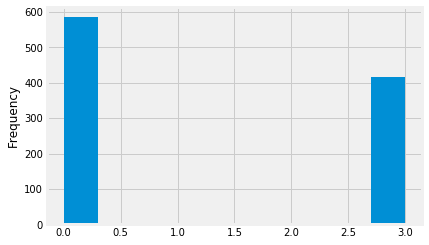

In [86]:
ub_df = pd.DataFrame(list(zip(res,res_values)))
ub_df
eq_df = pd.DataFrame(list(zip(res1,res1_values)))
eq_df[0].unique()
ub_df[0].plot.hist()
display(Markdown('**No arbitrage when the constraint is equal to 0**'))
display(eq_df[0].unique())
display(Markdown('**Maximum value of cost when constraint is equal to 0**'))
display(eq_df[1].max())
display(Markdown('**Minimum value of cost when constraint is greater than or equal to 0**'))
display(ub_df[1].min())
# Status of 0 means the Optimization terminated successfully and we can see when the constraint is 0 all the simulations had no arbitrage, that is the reason the only status is 0
# And the maximum value of cost when constraint is 0 is very close to 0 so no arbitrage
# when the constraint is set to be greater than equal to 0 we have around 410 simulations where first order arbitrage exists and 0 for second order arbitrageand 590 simulations had no arbitrage as shown in the histogram
# status of 3 indicates Problem appears to be unbounded which in this case means the first order arbitrage and all the values of cost when first order arbitrage exists are of great magnitude with a negative sign as can be seen from minimum cost value when constrain is greater than or equal to 0.

## Problem 2 (50 points):

You can obtain the constituents of the Dow Jones Industrial Average Index (DJIA) from [Wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average).

1. Scrape (if you can) the tickers for the DJIA from the website into a csv (or Excel) file.
2. Create a `Python` function (you can use `pandas_datareader`) to download the past 5 months of daily prices for all of the stocks in the DJIA, reading the tickers from a file. 
3. estimate the historical correlation and covariance matrix of the DJIA constituents' daily returns
4. estimate historical excess return of individual stocks (assume the historical risk free rate is 1%)
5. compute the optimal portfolio using the estimated historical excess return and covariance matrix, comment on whether the portfolio looks reasonable.
6. compute the implied return forecast from the actual DJIA portfolio, compare this to the historical estimate, comment on which may be a better forecast for the future returns.
7. compute the condition number of the covariance matrix, and comment on the numerical stability of the optimal portfolio. You can use the python function `numpy.linalg.norm` for matrix norm.
8. take the daily return time series, and split them into two segments: one containing only the odd days' returns and the other containing only the even days' returns. Then estimate every DJIA stock's annualized return and annualized vol from these two data segments, and compare the results. Please comment on which of the two metrics, return or volatility, can be reliably estimated from historical data. 
9. Please repeat the analysis using weekly returns and comment on whether the results are materially different
10. Use numerical simulation to show that the optimal portfolio above does indeed have the largest Sharp ratio for the historical excess return and covariance; the best way to illustrate this is to introduce many random perturbations around the optimal portfolio. `numpy.random` is a random number generator package in Python.
11. Comment on what practical implications you might infer from the results from part 10.

**Hints:**
* as discussed in class, returns are only meaningful in the relative sense, so please annualize all your results. You will lose credit without annualization.
* you may run into a singular matrix when inverting the covariance matrix, try to find a work around if you do, (imagine what you would do if your future boss needs some results fast, and doesn't understand why a singular matrix can't be inverted).
* for part 8, you can use array slice to split btw even and odd elements, see the following example:

```
whole = np.arange(1, 10)
print("whole = ", whole)
odd = whole[0::2]
even = whole[1::2]
print("even = ", even)
print("odd = ", odd)
```

## Problem 2 Solution 

## Part 1 & 2

In [1]:
import pandas as pd
import pandas_datareader as web
import datetime
start = datetime.datetime(2020,9,1)
end = datetime.datetime(2021,1,31)
df = pd.read_csv('djia_tickers.csv') # Ticker symbols loaded from a csv file to python
df.rename(columns = {'Company Name': 'company', 'Ticker Symbol': 'ticker'}, inplace= True) # renaming the columns
tickers = df.ticker.tolist() # converting tickers column into a list
def get_prices(stocks = tickers, start = start, end = end, col= 'Adj Close'): #defining a function to scrape the past 5 months daily prices using pandas_datareader
    data = web.DataReader(stocks, data_source = 'yahoo', start = start, end = end)[col]
    return data
daily_prices = get_prices(tickers) # scraping the prices
daily_prices

Symbols,MMM,AXP,AMGN,AAPL,CAT,CVX,CSCO,DOW,HON,INTC,...,GS,HD,PG,TRV,DIS,UNH,VZ,V,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,162.051208,101.687225,247.328415,133.749039,144.395081,80.734055,41.310841,46.170540,166.449371,50.119030,...,203.546661,281.135742,136.593094,113.117554,133.550003,309.330414,57.916721,212.698807,35.985233,146.441040
2020-09-02,166.682648,103.602478,254.486206,130.977966,147.578598,80.840950,41.694168,48.075188,170.908646,51.559738,...,208.084000,283.863708,138.896317,115.869308,135.389999,316.657501,59.257931,215.819260,36.386593,146.530350
2020-09-03,163.536026,103.662025,244.419937,120.491753,145.097031,79.956635,40.249325,47.264488,164.794495,49.724312,...,205.627090,271.439728,136.672180,113.768509,133.240005,312.692383,59.336250,208.322220,36.308281,143.414795
2020-09-04,163.005035,104.862778,244.903046,120.571503,146.500931,79.616531,40.121544,47.469604,165.180969,49.418411,...,208.975616,266.527496,136.375626,114.971779,131.990005,308.509705,59.208981,204.035339,36.112499,141.718109
2020-09-08,160.448410,102.878052,237.784683,112.457649,146.837097,76.740112,39.315578,46.815189,162.782883,48.263863,...,200.594391,266.132111,134.378815,112.180580,134.199997,303.812836,58.699909,199.509186,35.339146,137.372208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,168.997375,121.150002,255.202438,142.706757,187.339996,89.632996,45.029999,56.600998,200.980362,55.105511,...,281.932587,283.304688,132.240005,146.360001,171.889999,346.578705,58.419998,200.668457,47.368431,145.592117
2021-01-26,174.511932,116.150002,256.691376,142.946396,187.210007,88.114464,45.259998,55.127377,200.173935,54.876900,...,280.657593,280.840149,133.089996,143.710007,169.559998,341.895355,56.570000,201.696869,48.725491,146.896667
2021-01-27,185.124466,114.089996,249.207001,141.848038,180.630005,86.970627,45.700001,53.792213,198.501358,53.266674,...,272.260559,272.343384,128.380005,139.500000,163.029999,331.811188,55.130001,194.667786,50.696701,143.241928


## Part 3

In [18]:
from IPython.display import Markdown, display
daily_returns = daily_prices.pct_change() # Computing daily returns
cv = daily_returns.cov()*252 # Estimating annualised covariance matrix
corr = daily_returns.corr() #Estimating correlation matrix
display(Markdown('**Annualized Covariance Matrix:**'))
display(cv)
display(Markdown('**Correlation Matrix:**'))
display(corr)


**Annualized Covariance Matrix:**

Symbols,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Symbols,,,,,,,,,,,,,,,,,,,,,
AAPL,0.155738,0.044699,0.006314,0.047535,-0.002777,0.074735,0.033319,0.011915,0.011240,0.010161,...,0.015024,0.090170,0.020030,0.026315,0.024082,0.031748,0.042379,0.007900,0.000697,0.034040
AMGN,0.044699,0.072266,0.033341,0.042350,0.019789,0.024770,0.024746,0.032933,0.019166,0.025560,...,0.026877,0.037078,0.016019,0.017275,0.024176,0.042825,0.035711,0.015689,0.031772,0.016742
AXP,0.006314,0.033341,0.211818,0.164006,0.085585,0.015637,0.042494,0.133860,0.109279,0.106854,...,0.024152,0.012851,0.020933,-0.004999,0.074104,0.044235,0.075969,0.030394,0.080834,0.004627
BA,0.047535,0.042350,0.164006,0.250023,0.078524,0.026656,0.061672,0.141157,0.094634,0.111206,...,0.029907,0.029893,0.029043,0.006873,0.072625,0.038091,0.071902,0.030452,0.092794,0.015032
CAT,-0.002777,0.019789,0.085585,0.078524,0.102026,-0.000668,0.030612,0.073542,0.050618,0.088337,...,0.014862,0.001942,0.015656,0.015039,0.052470,0.015716,0.036180,0.022573,0.060208,0.012132
CRM,0.074735,0.024770,0.015637,0.026656,-0.000668,0.122270,0.019756,0.016918,0.017858,0.014197,...,0.014337,0.075664,0.014444,0.017594,0.004352,0.028426,0.041010,-0.000072,-0.020060,0.025606
CSCO,0.033319,0.024746,0.042494,0.061672,0.030612,0.019756,0.048501,0.042150,0.030809,0.038033,...,0.014637,0.028849,0.009667,0.014629,0.026279,0.021126,0.030638,0.012992,0.047852,0.016951
CVX,0.011915,0.032933,0.133860,0.141157,0.073542,0.016918,0.042150,0.162771,0.079602,0.102911,...,0.021869,0.012151,0.006074,0.000545,0.060079,0.028118,0.051938,0.024095,0.085117,0.013636
DIS,0.011240,0.019166,0.109279,0.094634,0.050618,0.017858,0.030809,0.079602,0.153805,0.058308,...,0.020047,0.024054,0.021839,0.006398,0.036296,0.027858,0.055938,0.020466,0.036088,0.008205


**Correlation Matrix:**

Symbols,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Symbols,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.421338,0.034765,0.240892,-0.022029,0.541585,0.383368,0.074836,0.072622,0.069317,...,0.187252,0.754119,0.192212,0.404397,0.209764,0.285213,0.410294,0.140339,0.004304,0.494838
AMGN,0.421338,1.000000,0.269483,0.315059,0.230469,0.263510,0.417983,0.303650,0.181794,0.255964,...,0.491747,0.455225,0.225667,0.389705,0.309132,0.564779,0.507547,0.409160,0.288174,0.357277
AXP,0.034765,0.269483,1.000000,0.712667,0.582183,0.097163,0.419253,0.720910,0.605436,0.625024,...,0.258102,0.092157,0.172244,-0.065872,0.553461,0.340748,0.630651,0.462994,0.428239,0.057681
BA,0.240892,0.315059,0.712667,1.000000,0.491649,0.152455,0.560042,0.699717,0.482581,0.598723,...,0.294183,0.197315,0.219957,0.083356,0.499259,0.270069,0.549401,0.426975,0.452484,0.172464
CAT,-0.022029,0.230469,0.582183,0.491649,1.000000,-0.005981,0.435180,0.570679,0.404077,0.744516,...,0.228843,0.020066,0.185613,0.285531,0.564662,0.174432,0.432769,0.495459,0.459593,0.217897
CRM,0.541585,0.263510,0.097163,0.152455,-0.005981,1.000000,0.256549,0.119920,0.130227,0.109300,...,0.201662,0.714177,0.156427,0.305146,0.042785,0.288206,0.448093,-0.001450,-0.139877,0.420098
CSCO,0.383368,0.417983,0.419253,0.560042,0.435180,0.256549,1.000000,0.474393,0.356708,0.464917,...,0.326899,0.432343,0.166225,0.402844,0.410172,0.340081,0.531523,0.413601,0.529777,0.441553
CVX,0.074836,0.303650,0.720910,0.699717,0.570679,0.119920,0.474393,1.000000,0.503091,0.686687,...,0.266606,0.099401,0.057017,0.008190,0.511877,0.247082,0.491848,0.418707,0.514396,0.193892
DIS,0.072622,0.181794,0.605436,0.482581,0.404077,0.130227,0.356708,0.503091,1.000000,0.400249,...,0.251413,0.202433,0.210876,0.098936,0.318132,0.251832,0.544956,0.365867,0.224360,0.120017


## Part 4

In [19]:
#Estimating the annualised 5 month return for the 30 stocks
annual_return = []
for column in daily_prices:
    annual_ret = [column,((daily_prices[column][-1]/daily_prices[column][0])**(252/104)-1)]
    annual_return.append(annual_ret)
annual_return = pd.DataFrame(annual_return)
annual_return[1] = annual_return[1] - 0.01 # Estimating the excess historical return
annual_return

,0,1
0,AAPL,-0.045599
1,AMGN,-0.083589
2,AXP,0.373361
3,BA,0.329925
4,CAT,0.761785
5,CRM,-0.424138
6,CSCO,0.192668
7,CVX,0.091254
8,DIS,0.738080
9,DOW,0.282612


## Part 5

In [39]:
# Estimating the optimal portfolio using annual exccess returns and annualized covariance matrix
import numpy as np
ret = annual_return[1].values.tolist()
er = np.array(ret)
cvi = np.linalg.inv(cv)
w = cvi.dot(er.T)/er.dot(cvi).dot(er.T)
w = w/np.sum(w)
ticks = annual_return[0].values.tolist()
ticks
a = w.tolist()
weights = pd.DataFrame(list(zip(ticks,a)))
display(Markdown('**Optimal Portfolio Weights**'))
display(weights)
sum(weights[1]) # all weights add up to 1 approximately
#The portfolio looks reasonable since shorting is allowed there are some weights greater than 1 and since all weights add upt o 1 its a reasonable portfolio with low variance


**Optimal Portfolio Weights**

,0,1
0,AAPL,0.423873
1,AMGN,0.304968
2,AXP,1.164056
3,BA,-0.141124
4,CAT,-1.054494
5,CRM,0.135461
6,CSCO,-0.314536
7,CVX,1.155046
8,DIS,-0.808894
9,DOW,-0.067258


0.9999999999999996

## Part 6

In [58]:
# Estimating the Implied returns of the portfolio
df = pd.read_csv('djia_mkt_weights.csv')
df.sort_values('Ticker', inplace= True)

w1 = np.array(df['Mkt_weights'])

vb = w1.T.dot(cv).dot(w1)
ir = cv.dot(w1)/vb
vb_portfolio =  w.T.dot(cv).dot(w)
ir_portfolio = cv.dot(w)/vb
ir = pd.DataFrame(list(zip(ticks,ir,ret,ir_portfolio)))
ir.columns = ['Symbol', 'Implied Return Mkt', 'Historical Return','Implied Return Optimal Portfolio']
display(Markdown('**Comparitive view of Implied and Historical Returns**'))
display(ir)
# As we can see that the implied market returns forecast results in higher returns for higher ris and the historical returns depict the actual movement of the stock price, there is inconsistency by a huge margin between historical and implied returns, so my opinion is to use the historical returns to forecast future return.


**Comparitive view of Implied and Historical Returns**

,Symbol,Implied Return Mkt,Historical Return,Implied Return Optimal Portfolio
0,AAPL,1.054327,-0.045599,0.134471
1,AMGN,0.915518,-0.083589,0.246504
2,AXP,1.804485,0.373361,-1.101043
3,BA,2.045318,0.329925,-0.972950
4,CAT,1.148681,0.761785,-2.246504
5,CRM,0.842787,-0.424138,1.250783
6,CSCO,0.875996,0.192668,-0.568179
7,CVX,1.556749,0.091254,-0.269107
8,DIS,1.243491,0.738080,-2.176597
9,DOW,1.396077,0.282612,-0.833424


## Part 7

In [34]:
# Computing the Condition Number of the covariance Matrix
condition_number = np.linalg.norm(cv)*np.linalg.norm(cvi)
display(Markdown('**Condition Number of Covariance Matrix**'))
display(condition_number)
display(Markdown('**Number of Decimal places loss of accuracy**'))
display(np.log10(condition_number))
#based on the condition number , we can say the matrix is ill conditions and since the accuracy is lost till 2 decimal points we can say that the matrix is numerically unstable

**Condition Number of Covariance Matrix**

521.4618224518659

**Number of Decimal places loss of accuracy**

2.717222518121293

## Part 8

In [98]:
# Slicing the dataframes to odd and even dates
daily_returns['Date'] = daily_returns.index
daily_returns['day'] = daily_returns['Date'].dt.day
is_even = daily_returns['day'].astype(int) % 2 == 0
daily_returns_even = daily_returns[is_even]
daily_returns_odd = daily_returns[~is_even]

daily_prices['Date'] = daily_prices.index
daily_prices['day'] = daily_prices['Date'].dt.day
is_even_1 = daily_prices['day'].astype(int) % 2 == 0
daily_prices_even = daily_prices[is_even_1]
daily_prices_odd = daily_prices[~is_even_1]

In [122]:
# Calculating the annual returns for odd and even days
annual_return_even = []
for column in daily_prices_even[ticks]:
    annual_ret = [column,((daily_prices_even[column][-1]/daily_prices_even[column][0])**(252/52)-1)]
    annual_return_even.append(annual_ret)
annual_return_even = pd.DataFrame(annual_return_even)
annual_return_odd = []
for column in daily_prices_odd[ticks]:
    annual_ret1 = [column,((daily_prices_odd[column][-1]/daily_prices_odd[column][0])**(252/52)-1)]
    annual_return_odd.append(annual_ret1)
annual_return_odd = pd.DataFrame(annual_return_odd)
    
annual_return_odd_even = pd.concat([annual_return_odd, annual_return_even], axis =1 )
annual_return_odd_even.columns = ['Symbol_odd', 'odd_days_return', 'Symbol', "even_days_return"]
display(Markdown('**Annualised returns for odd and even days**'))
display(annual_return_odd_even)


**Annualised returns for odd and even days**

,Symbol_odd,odd_days_return,Symbol,even_days_return
0,AAPL,-0.069931,AAPL,0.238362
1,AMGN,-0.141763,AMGN,-0.152874
2,AXP,0.913689,AXP,0.954769
3,BA,0.795400,BA,0.796107
4,CAT,2.139221,CAT,1.938462
5,CRM,-0.656766,CRM,-0.620906
6,CSCO,0.446411,CSCO,0.501171
7,CVX,0.212760,CVX,0.490388
8,DIS,2.055782,DIS,2.178699
9,DOW,0.670846,DOW,0.722256


In [127]:
#calculating the volatilities for odd and even days
annual_vol_even = []
for column in daily_returns_even[ticks]:
    annual_vol = [column, (daily_returns_even[column].std()*sqrt(252))]
    annual_vol_even.append(annual_vol)
annual_vol_even = pd.DataFrame(annual_vol_even)
annual_vol_odd = []
for column in daily_returns_odd[ticks]:
    annual_vol1 = [column, (daily_returns_odd[column].std()*sqrt(252))]
    annual_vol_odd.append(annual_vol1)
annual_vol_odd = pd.DataFrame(annual_vol_odd)
annual_vol_odd
annual_vol_odd_even = pd.concat([annual_vol_odd, annual_vol_even], axis =1 )
annual_vol_odd_even.columns = ['Symbol_odd', 'odd_days_vol', 'Symbol', "even_days_vol"]
display(Markdown('**Annualised Volatility for odd and even days**'))
display(annual_vol_odd_even)

# From these two dataframes we can conclude that the volatility is much more consistent for odd and even days compared to the returns.
#So volatility can be estimated reliably from the historical data.


**Annualised Volatility for odd and even days**

,Symbol_odd,odd_days_vol,Symbol,even_days_vol
0,AAPL,0.395646,AAPL,0.392265
1,AMGN,0.231577,AMGN,0.302470
2,AXP,0.570823,AXP,0.322494
3,BA,0.524879,BA,0.474601
4,CAT,0.318230,CAT,0.322241
5,CRM,0.327708,CRM,0.367209
6,CSCO,0.250931,CSCO,0.187034
7,CVX,0.420953,CVX,0.383434
8,DIS,0.477197,DIS,0.287032
9,DOW,0.376401,DOW,0.369438


## Part 9

In [128]:
# Extracting weekly prices to calculate weekly returns
def get_weekly_prices(stocks = tickers, start = start, end = end, col= 'Adj Close'): #defining a function to scrape the past 5 months daily prices using pandas_datareader
    data = web.DataReader(stocks, data_source = 'yahoo', start = start, end = end)[col]
    data = data.asfreq('W-FRI', method='pad')
    return data
weekly_prices = get_weekly_prices(tickers)

In [130]:
weekly_returns = weekly_prices.pct_change()

In [131]:
weekly_returns

Symbols,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-11,-0.074074,-0.020894,-0.021860,-0.063256,0.038129,-0.045544,-0.023028,-0.051752,-0.001818,0.025720,...,-0.008916,-0.047701,0.049822,0.001305,-0.019869,-0.029736,-0.019447,-0.011409,-0.059366,-0.042918
2020-09-18,-0.046071,0.018544,0.000774,0.005679,-0.009361,-0.001316,-0.001755,0.006693,-0.023681,0.010431,...,0.023131,-0.017841,-0.028305,-0.005574,-0.015785,0.021693,0.009617,0.009366,0.064265,-0.010315
2020-09-25,0.050917,-0.015744,-0.069412,-0.031712,-0.042522,-0.000165,-0.034162,-0.081575,-0.035995,-0.085964,...,-0.033562,0.037078,0.083464,0.001820,-0.031359,-0.017921,-0.026455,-0.015907,-0.040617,0.014635
2020-10-02,0.006591,0.006521,0.055579,0.077229,0.027620,0.021051,0.004499,-0.008910,-0.011694,0.027585,...,-0.025684,-0.007843,0.019399,0.003633,0.004347,0.031339,0.021344,-0.002526,0.009596,0.023530
2020-10-09,0.034950,-0.035492,0.050922,-0.004462,0.060024,0.073149,0.041286,0.039472,0.019829,0.043331,...,-0.005446,0.046656,0.034270,0.034752,0.066771,0.050837,0.025712,0.012183,0.015935,0.016228
2020-10-16,0.017526,-0.004140,-0.013447,0.000120,0.061721,-0.027935,0.007779,-0.015000,0.014642,-0.001216,...,-0.006595,0.017840,-0.022751,0.010285,-0.021670,0.006284,-0.030875,-0.021574,0.029444,0.013517
2020-10-23,-0.033440,-0.036314,-0.037461,0.000060,0.005154,-0.031058,-0.033367,-0.004390,0.012144,-0.015619,...,0.000000,-0.015615,0.015547,-0.008445,0.111631,0.002122,-0.011235,-0.001550,0.016840,-0.005943
2020-10-30,-0.053720,-0.044990,-0.096455,-0.137249,-0.068450,-0.072848,-0.075219,-0.042304,-0.055318,-0.062642,...,-0.057873,-0.063636,-0.076237,-0.037084,-0.041756,-0.077011,-0.082319,-0.016736,-0.105152,-0.035454


In [132]:
weekly_returns['Date'] = weekly_returns.index
weekly_returns['day'] = weekly_returns['Date'].dt.day
is_even = weekly_returns['day'].astype(int) % 2 == 0
weekly_returns_even = weekly_returns[is_even]
weekly_returns_odd = weekly_returns[~is_even]

weekly_prices['Date'] = weekly_prices.index
weekly_prices['day'] = weekly_prices['Date'].dt.day
is_even_1 = weekly_prices['day'].astype(int) % 2 == 0
weekly_prices_even = weekly_prices[is_even_1]
weekly_prices_odd = weekly_prices[~is_even_1]

In [136]:
annual_return_even = []
for column in weekly_prices_even[ticks]:
    annual_ret = [column,((weekly_prices_even[column][-1]/weekly_prices_even[column][0])**(52/10)-1)]
    annual_return_even.append(annual_ret)
annual_return_even = pd.DataFrame(annual_return_even)
annual_return_odd = []
for column in weekly_prices_odd[ticks]:
    annual_ret1 = [column,((weekly_prices_odd[column][-1]/weekly_prices_odd[column][0])**(52/10)-1)]
    annual_return_odd.append(annual_ret1)
annual_return_odd = pd.DataFrame(annual_return_odd)
    
annual_return_odd_even = pd.concat([annual_return_odd, annual_return_even], axis =1 )
annual_return_odd_even.columns = ['Symbol_odd', 'odd_weeks_return', 'Symbol', "even_weeks_return"]
display(Markdown('**Annualised Weekly returns for odd and even days**'))
display(annual_return_odd_even)
# The returns seem to be materially different  for odd and even weeks.

**Annualised Weekly returns for odd and even days**

,Symbol_odd,odd_weeks_return,Symbol,even_weeks_return
0,AAPL,1.367332,AAPL,1.084345
1,AMGN,-0.002989,AMGN,0.151293
2,AXP,0.918326,AXP,1.613386
3,BA,1.717139,BA,1.618875
4,CAT,1.605508,CAT,3.074653
5,CRM,-0.322544,CRM,-0.465788
6,CSCO,0.952438,CSCO,0.768354
7,CVX,0.743311,CVX,0.941527
8,DIS,2.557862,DIS,3.056510
9,DOW,0.315833,DOW,1.558312


In [137]:
#calculating the volatilities for odd and even days
annual_vol_even = []
for column in weekly_returns_even[ticks]:
    annual_vol = [column, (weekly_returns_even[column].std()*sqrt(52))]
    annual_vol_even.append(annual_vol)
annual_vol_even = pd.DataFrame(annual_vol_even)
annual_vol_odd = []
for column in weekly_returns_odd[ticks]:
    annual_vol1 = [column, (weekly_returns_odd[column].std()*sqrt(52))]
    annual_vol_odd.append(annual_vol1)
annual_vol_odd = pd.DataFrame(annual_vol_odd)
annual_vol_odd
annual_vol_odd_even = pd.concat([annual_vol_odd, annual_vol_even], axis =1 )
annual_vol_odd_even.columns = ['Symbol_odd', 'odd_weeks_vol', 'Symbol', "even_weeks_vol"]
display(Markdown('**Annualised weekly Volatility for odd and even days**'))
display(annual_vol_odd_even)

# From these two dataframes we can conclude that the volatility is much more consistent for odd and even weeks compared to the returns.
#So volatility can be estimated reliably from the historical data.


**Annualised weekly Volatility for odd and even days**

,Symbol_odd,odd_weeks_vol,Symbol,even_weeks_vol
0,AAPL,0.287626,AAPL,0.368667
1,AMGN,0.208513,AMGN,0.272569
2,AXP,0.548479,AXP,0.335252
3,BA,0.514759,BA,0.507130
4,CAT,0.264139,CAT,0.286068
5,CRM,0.243274,CRM,0.439560
6,CSCO,0.295549,CSCO,0.245254
7,CVX,0.503049,CVX,0.291045
8,DIS,0.391304,DIS,0.236940
9,DOW,0.374209,DOW,0.262565


## Problem 3 (25 points):

In Lecture 2, there was code for generating sample paths of geometric Brownian motion. (GBM). In that case, the various sample paths were independent of each other. For this problem, you are to produce (or modify) code to generate 4 **correlated** paths of geometric Brownian motion.

## Problem 3 Solution

Populating the interactive namespace from numpy and matplotlib


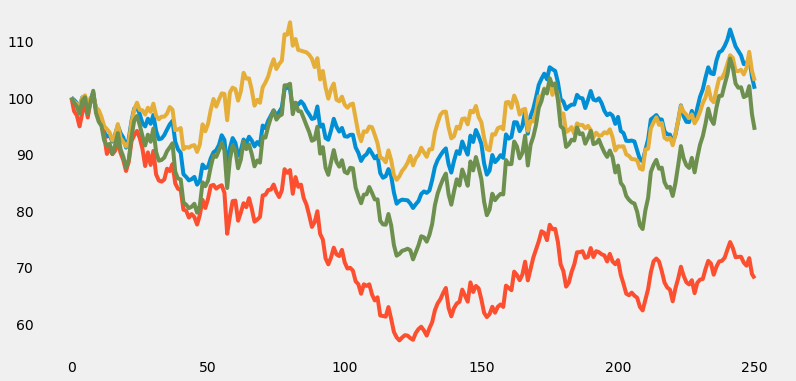

In [35]:
%pylab inline
import numpy as np
#Genarating a positive semidefinite 4X4 covariance matrix
from scipy import random, linalg
a = random.rand(4,4) # creating a matrtrix using random number
b = np.dot(a,a.transpose()) # squaring the matrix to make it positive semidefinite 
# Generating 4 correlated random variables
import numpy as np
from scipy.linalg import eigh, cholesky
from scipy.stats import norm

from pylab import plot, show, axis, subplot, xlabel, ylabel, grid


# Choice of cholesky or eigenvector method.
method = 'cholesky'
#method = 'eigenvectors'

num_samples = 400

# The desired covariance matrix.
r = np.array(b) # using the generated non singular matrix as a covariance matrix

# Generate samples from three independent normally distributed random
# variables (with mean 0 and std. dev. 1).
x = norm.rvs(size=(4, num_samples))

# We need a matrix `c` for which `c*c^T = r`.  We can use, for example,
# the Cholesky decomposition, or the we can construct `c` from the
# eigenvectors and eigenvalues.

if method == 'cholesky':
    # Compute the Cholesky decomposition.
    c = cholesky(r, lower=True)
else:
    # Compute the eigenvalues and eigenvectors.
    evals, evecs = eigh(r)
    # Construct c, so c*c^T = r.
    c = np.dot(evecs, np.diag(np.sqrt(evals)))

# Convert the data to correlated random variables. 
y = np.dot(c, x)
#plotting the correlated geometric brownian motion 
S0 = 100
rf = 0.05
v = 0.25
T = 1
N = 250
dt = T / N

plt.style.use('fivethirtyeight')
plt.figure(figsize = (12, 6))
for j in range(4):
    p = np.zeros([N + 1, 1])
    p[0] = S0
    for i in range(N):
        p[i + 1] = p[i] * (1 + rf * dt + np.sqrt(dt) * v * y[j][i]) #using the 4 correlated random variables for 4 different paths of GBM
    plt.plot(p)
    
plt.grid()
